# 本文紀錄Python繪圖的方法-使用 Seaborn

In [295]:
#匯入必要模組
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

> seaborn.lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)

說明可見[連結](https://blog.csdn.net/zyb228/article/details/100899779)

In [296]:
#匯入data
fmri = sns.load_dataset("fmri")

In [297]:
#觀察fmri的資料型態是pandas
print(type(fmri))
#觀察欄位
print(fmri.head())

<class 'pandas.core.frame.DataFrame'>
  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


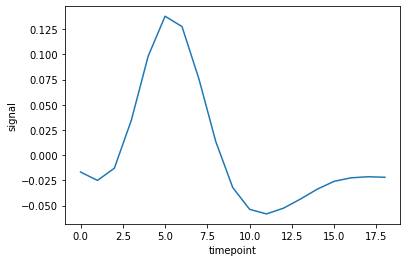

In [298]:
ax = sns.lineplot(x="timepoint", y="signal", data=fmri,err_style=None)

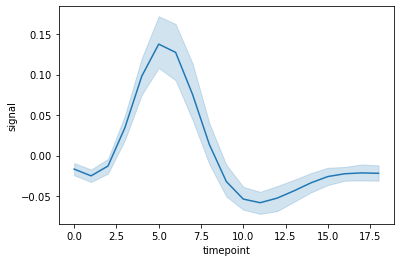

In [299]:
ax = sns.lineplot(x="timepoint", y="signal", data=fmri,err_style='band')

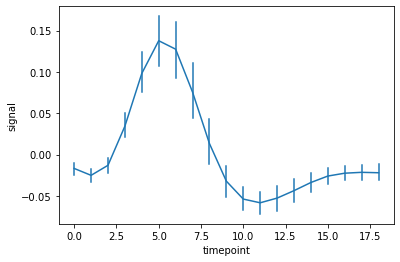

In [300]:
ax = sns.lineplot(x="timepoint", y="signal", data=fmri,err_style='bars')

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

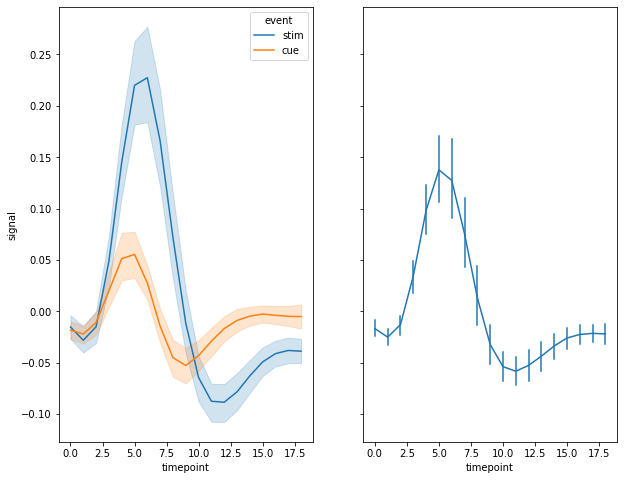

In [301]:
fig,axs=plt.subplots(1,2,figsize=(10,8),sharey=True)
sns.lineplot(x="timepoint", y="signal", hue="event",data=fmri,ax=axs[0])
sns.lineplot(x="timepoint", y="signal", data=fmri,err_style='bars',ax=axs[1])
#設定hue="event"會畫出，不同的event對應的signal數值vs.timepoint

In [302]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [303]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<AxesSubplot:xlabel='year'>

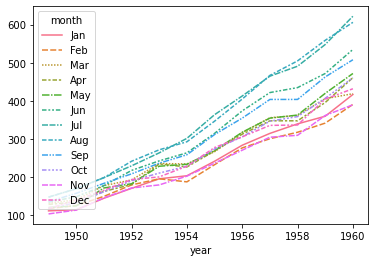

In [304]:
#畫出不同月份乘客人數和年份的關係
sns.lineplot(data=flights_wide)

<AxesSubplot:xlabel='year', ylabel='passengers'>

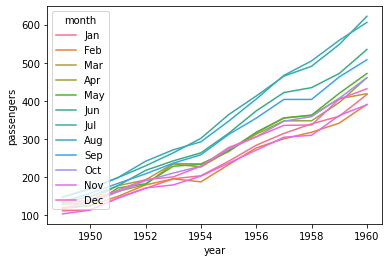

In [305]:
#和上例是等效的，但是每組以不同“顏色”線分開
sns.lineplot(data=flights, x="year", y="passengers", hue="month")

<AxesSubplot:xlabel='year', ylabel='passengers'>

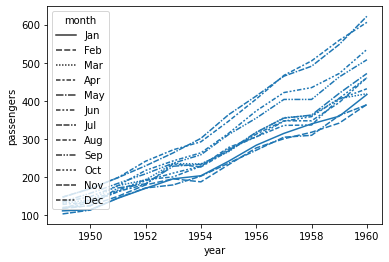

In [306]:
#和上例是等效的，但是每組以不同“破折號”種類分開
sns.lineplot(data=flights, x="year", y="passengers", style="month")

<AxesSubplot:xlabel='year', ylabel='passengers'>

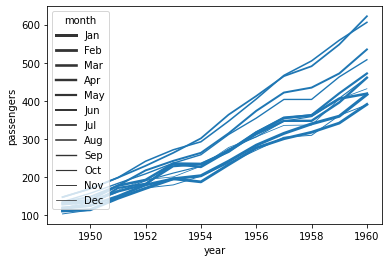

In [307]:
#和上例是等效的，但是每組以不同“粗細的線”分開
sns.lineplot(data=flights, x="year", y="passengers", size="month")

# [relplot](https://zhuanlan.zhihu.com/p/52814655)

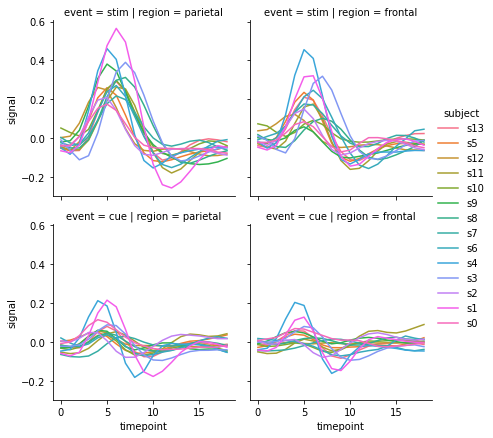

In [308]:
#畫出不同region和event組合下不同的subject的signal vs. timepoint
sns.relplot(x="timepoint", y="signal", hue="subject", col="region", 
            row="event", height=3, kind="line", estimator=None, data=fmri);

     subject  timepoint event   region    signal
67        s0          0  stim  frontal -0.021452
170       s2          6  stim  frontal  0.101050
267      s10          4  stim  frontal  0.030044
268      s11          4  stim  frontal  0.075957
269       s3          0  stim  frontal  0.011056
...      ...        ...   ...      ...       ...
1058      s1          8   cue  frontal -0.136059
1059      s0          8   cue  frontal  0.018165
1060     s13          7   cue  frontal -0.029130
1061     s12          7   cue  frontal -0.004939
1062     s11          7   cue  frontal -0.025367

[532 rows x 5 columns]


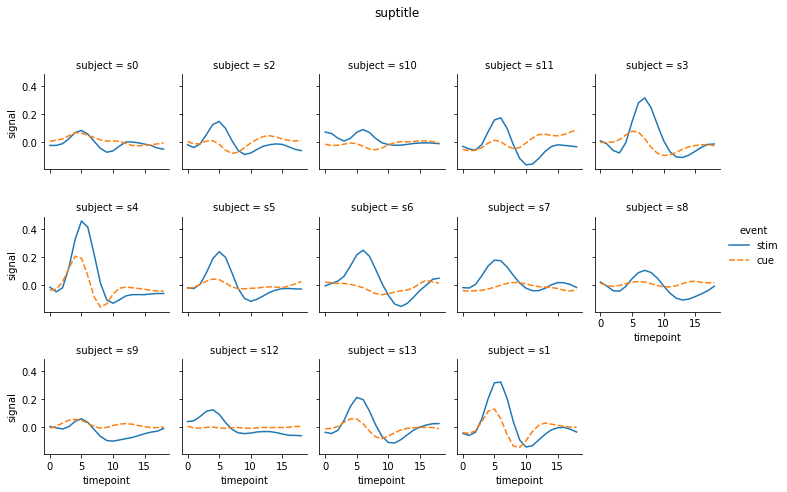

In [309]:
print(fmri.query("region == 'frontal'"))
#大量水平變量狀況下，若展開多個圖，可以用col_wrap來指定圖片數目達到多少時換行，此利用以5為例
g=sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=2, aspect=1, linewidth=1.5,
            kind="line", data=fmri.query("region == 'frontal'"));
#height:圖片高
#aspect:圖片寬
#linewidth:線寬
#kind:指定繪圖方式
g.fig.suptitle('suptitle',x=0.5,y=1.1)
plt.subplots_adjust(wspace=0.1,hspace=0.5)

# [pairplot](https://killer0001.blogspot.com/2018/09/1-seaborn.html)

In [310]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


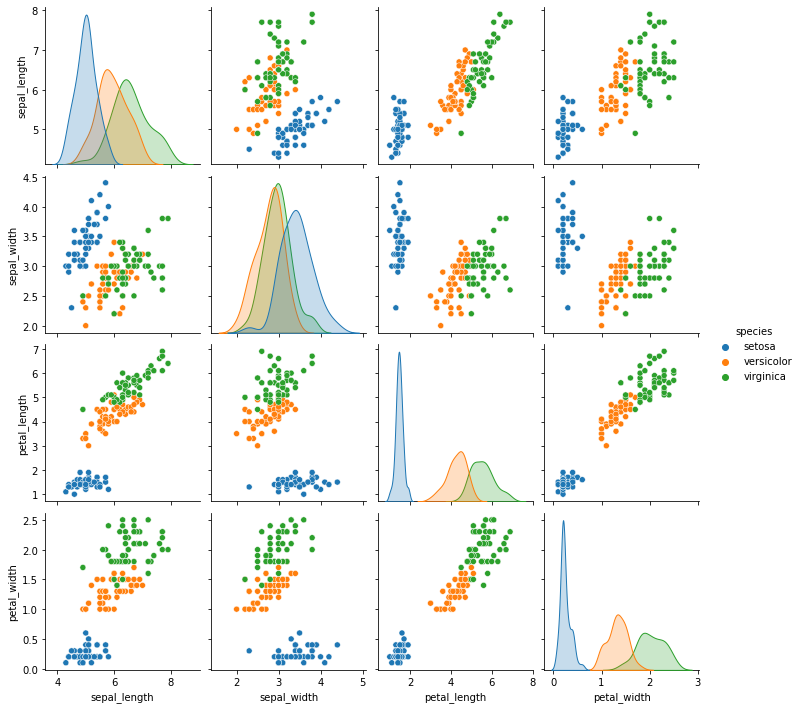

In [311]:
sns.pairplot(data=iris,hue="species")

# [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)

seaborn.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7fecadf1cee0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)

[other reference](https://kknews.cc/zh-tw/code/63ggvgq.html)

In [312]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<AxesSubplot:xlabel='day', ylabel='total_bill'>

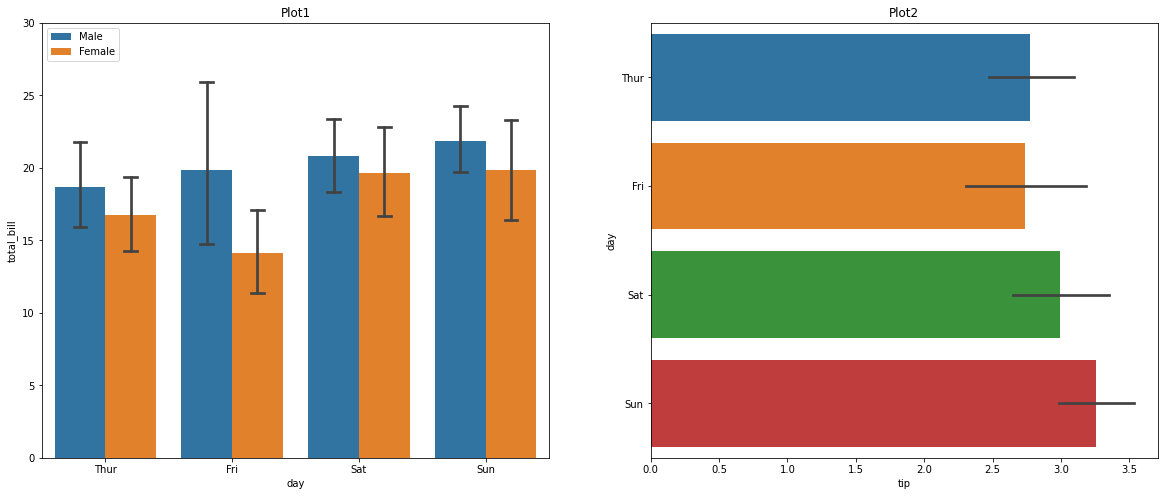

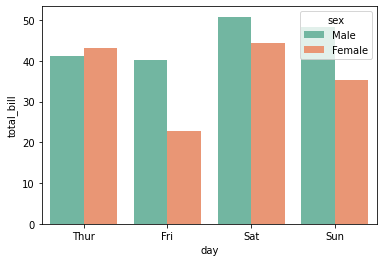

In [313]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
data=sns.load_dataset('tips')
print(data)
##默認分組取平均值，capsize是設置誤差帽條(可和ci混用，用ci設置信心水準，用capsize設定帽蓋長度)
sns.barplot(x='day',y='total_bill',hue='sex',data=data,ax=axs[0],capsize=0.1)
sns.barplot(x='tip',y='day',data=data,ci=95,ax=axs[1])#ci表示信心水準(可設置float,sd,None)

axs[0].set_title('Plot1')
axs[1].set_title('Plot2')

axs[0].set_ylim(0,30)
# axs[1].set_xlim(0,4)

axs[0].legend(loc=2)
plt.subplots_adjust(wspace=0.2)

##若分組想要取其他種類的統計量，要透過estimator
fig.ax=plt.subplots()
#palette是著色表，可以參考以下網址
#https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
sns.barplot(x='day',y='total_bill',hue='sex',ci=None,data=data,estimator=np.max,palette="Set2")


# [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)


seaborn.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)

[Other reference]()

In [314]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [315]:
data=sns.load_dataset("penguins")
print(data)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

Text(0.5, 1.0, 'Histplot2')

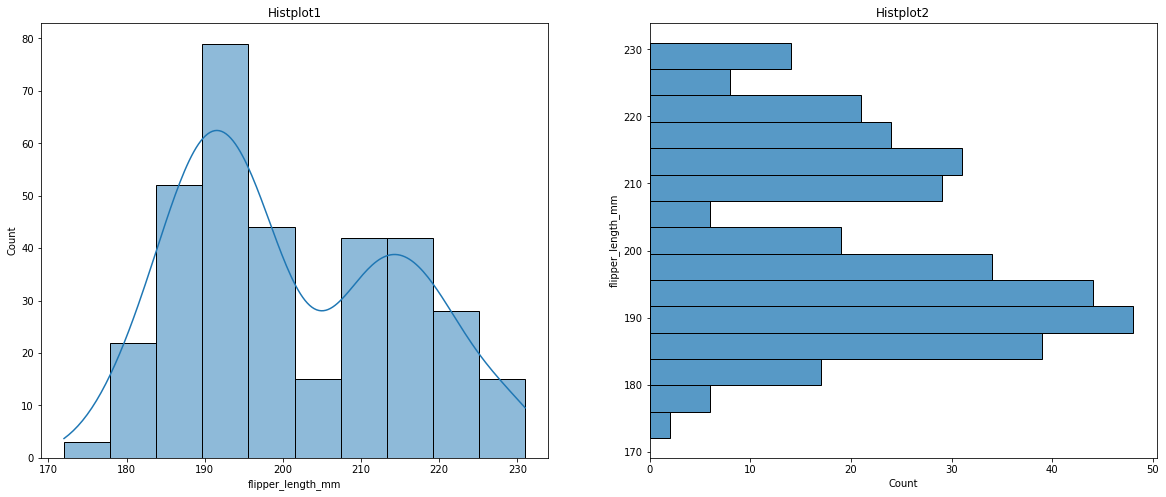

In [316]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
sns.histplot(data=data, x="flipper_length_mm",ax=axs[0],kde=True)
sns.histplot(data=data, y="flipper_length_mm",ax=axs[1],bins=15)
axs[0].set_title('Histplot1')
axs[1].set_title('Histplot2')

Text(0.5, 1.0, 'stat=probability, fill=False')

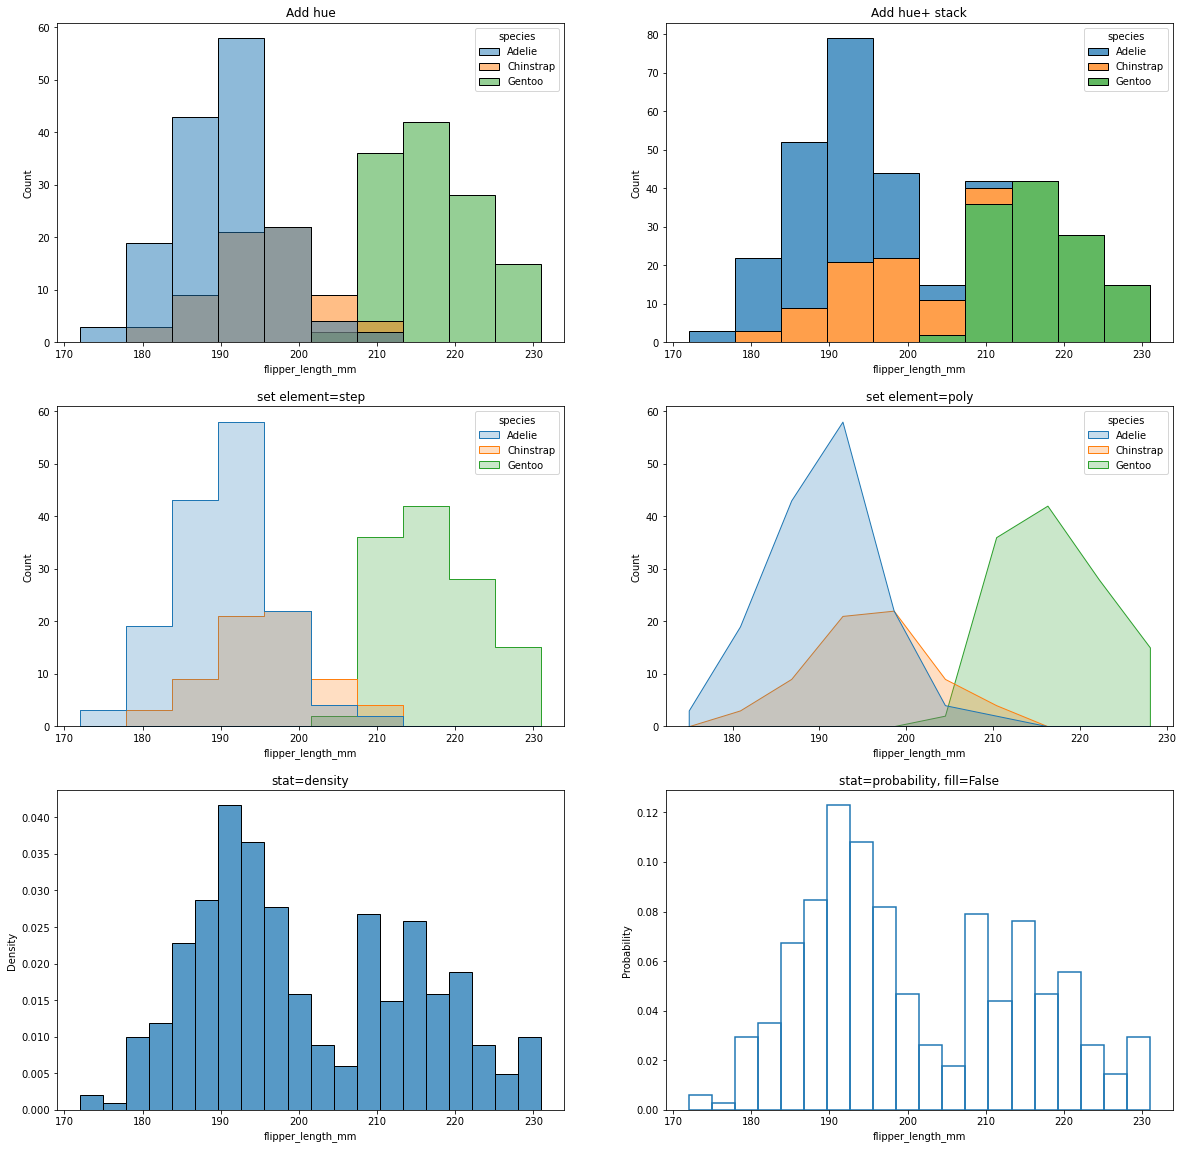

In [317]:
fig,axs=plt.subplots(3,2,figsize=(20,20))
sns.histplot(data=data, x="flipper_length_mm", hue="species",ax=axs[0][0])
sns.histplot(data=data, x="flipper_length_mm", hue="species",ax=axs[0][1],multiple="stack")
sns.histplot(data=data, x="flipper_length_mm", hue="species",ax=axs[1][0], element="step")
sns.histplot(data=data, x="flipper_length_mm", hue="species",ax=axs[1][1], element="poly")

axs[0][0].set_title('Add hue')
axs[0][1].set_title('Add hue+ stack')
axs[1][0].set_title('set element=step')
axs[1][1].set_title('set element=poly')

sns.histplot(data=data, x="flipper_length_mm",ax=axs[2][0],bins=20,stat='density')
sns.histplot(data=data, x="flipper_length_mm",ax=axs[2][1],bins=20,stat='probability',fill=False)
axs[2][0].set_title('stat=density')
axs[2][1].set_title('stat=probability, fill=False')

> X 和 Y都指定的histplot

               method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]


<AxesSubplot:xlabel='year', ylabel='distance'>

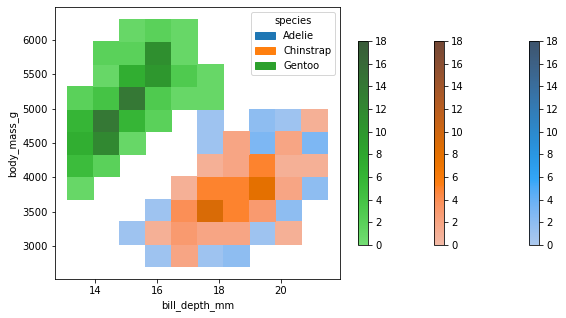

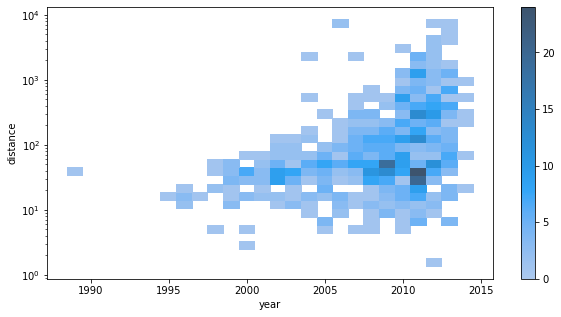

In [318]:
plt.subplots(figsize=(10,5))
data1=data
sns.histplot(data=data1, x="bill_depth_mm", y="body_mass_g", hue="species",cbar=True, cbar_kws=dict(shrink=.75))

plt.subplots(figsize=(10,5))
data2=sns.load_dataset('planets')
print(data2)
#discrtete的tuple個對應到x軸和y軸，log_scale同理
sns.histplot(data=data2, x="year", y="distance",bins=30, discrete=(True,False),cbar=True,log_scale=(False, True))

# [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)


seaborn.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
tips=sns.load_dataset('tips')

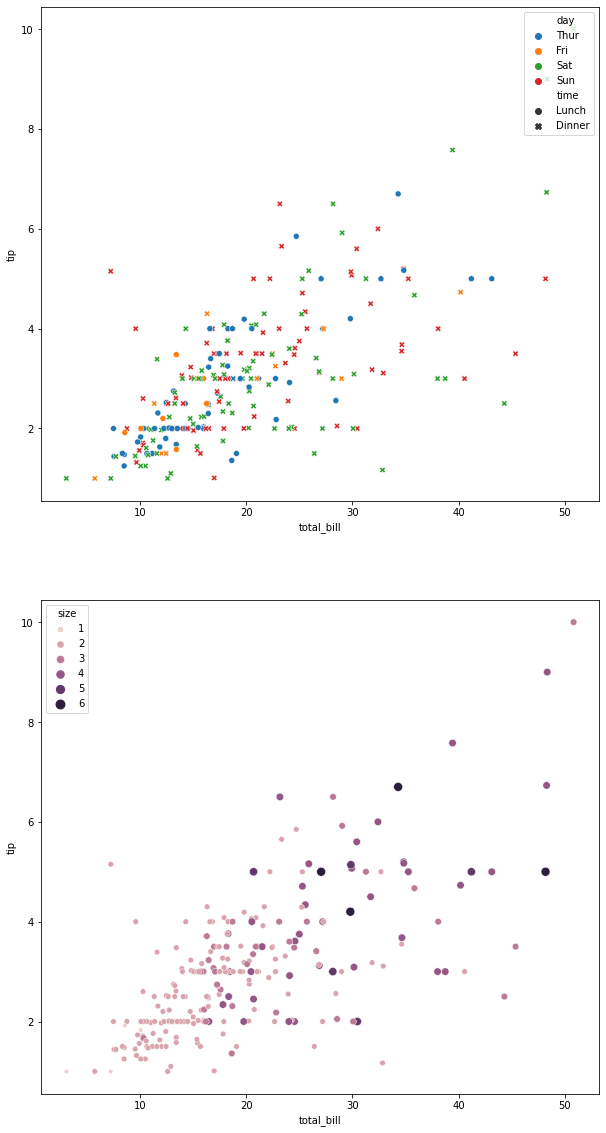

In [321]:
fig,axs=plt.subplots(2,1,figsize=(10,20))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time",ax=axs[0])
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size",size="size",sizes=(20, 80), legend="full")
axs[0].legend(loc=1)

# [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)


seaborn.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)¶

In [322]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='day', ylabel='total_bill'>

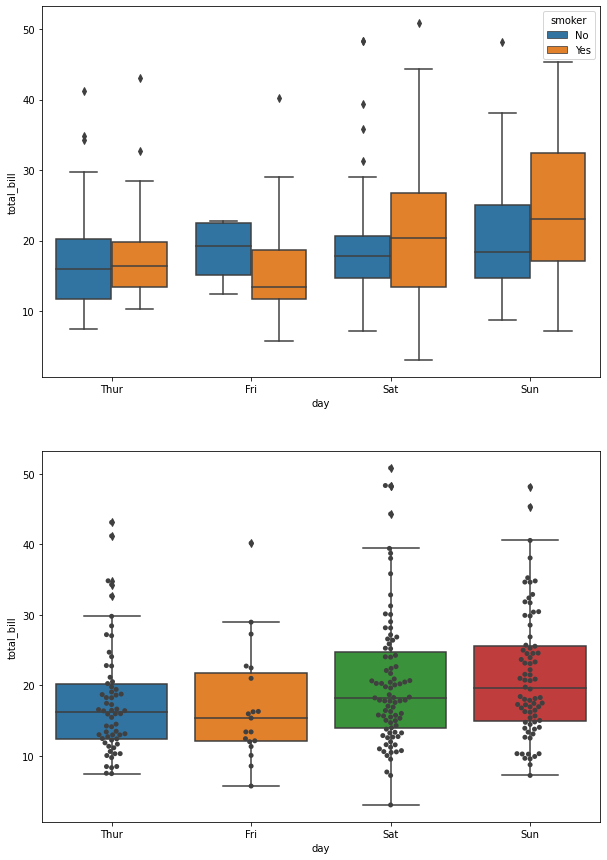

In [323]:
fig,axs=plt.subplots(2,1,figsize=(10,15))
tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips,linewidth=1.5,hue_order=['No','Yes'],ax=axs[0])
sns.boxplot(x="day", y="total_bill",data=tips,ax=axs[1])
sns.swarmplot(x="day", y="total_bill",data=tips, color=".25",ax=axs[1])

# [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

seaborn.violinplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

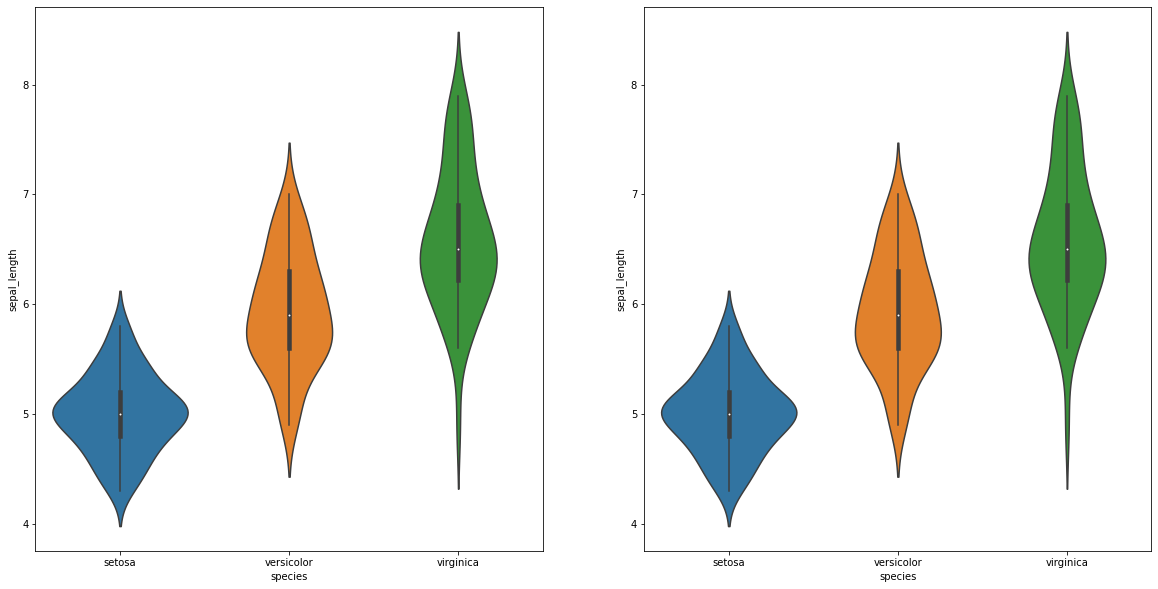

In [324]:
fig,axs=plt.subplots(1,2,figsize=(20,10))
iris = sns.load_dataset("iris")
sns.violinplot(x="species", y="sepal_length", data=iris,ax=axs[0])
sns.violinplot(x=iris.species, y=iris.sepal_length,ax=axs[1])

# [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)


seaborn.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7fecadf1cee0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

Return: [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid)

[Other reference](https://kknews.cc/zh-tw/code/z82gxqq.html)

In [325]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

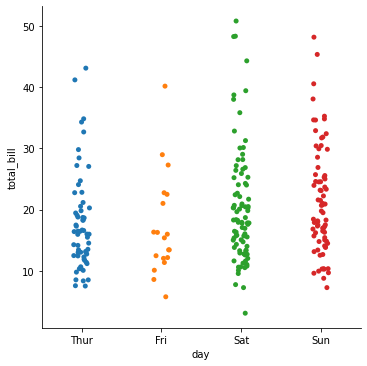

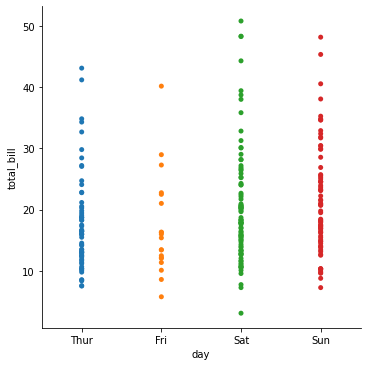

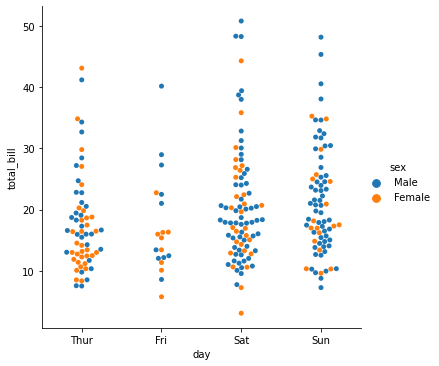

In [326]:
#分類散點圖

#stript plot
sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);
#stript plot + jitter
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);
#swarm plot
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);
plt.show()

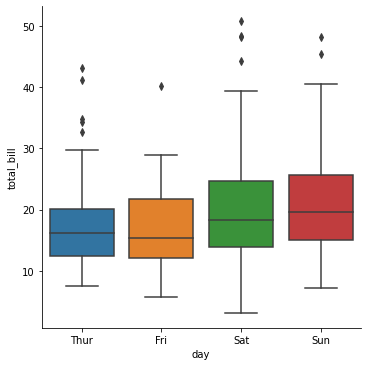

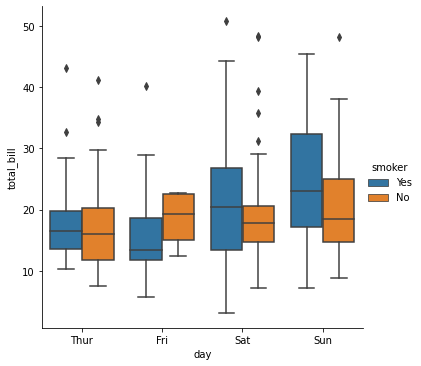

In [327]:
#分類分布圖

##boxplot
sns.catplot(x="day", y="total_bill", kind="box", data=tips);
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

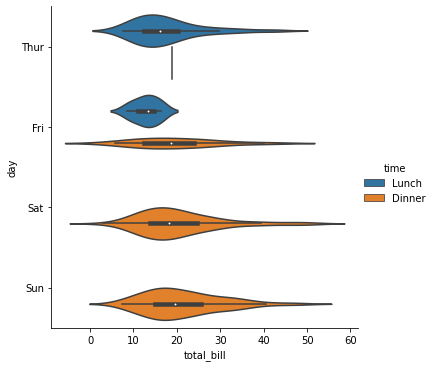

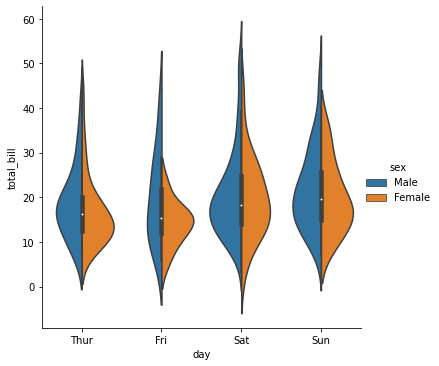

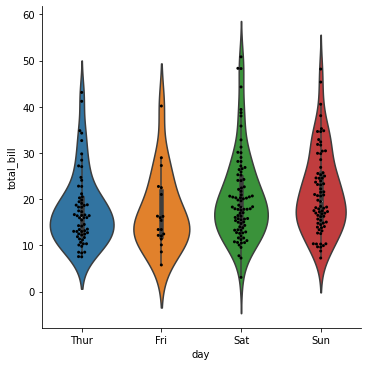

In [328]:
#小提琴圖(violin plot)
sns.catplot(x="total_bill", y="day", hue="time", kind="violin", data=tips);
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips);
g=sns.catplot(x="day", y="total_bill", kind="violin", data=tips);
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

Text(0.5, 1.0, 'Survived vs. sex between differenrt class')

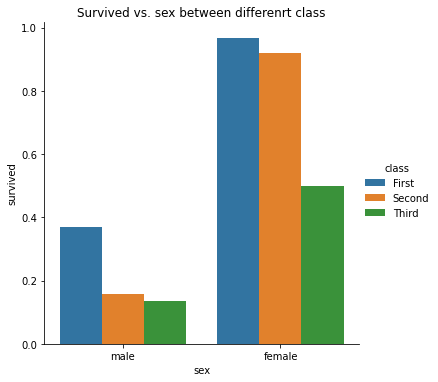

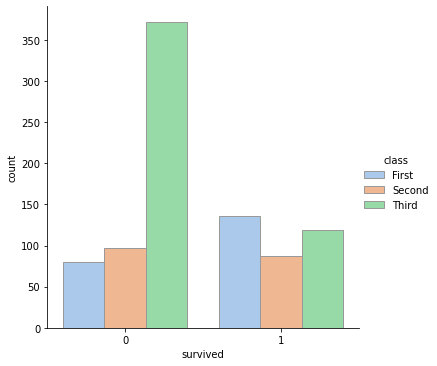

In [329]:
#分類統計估計圖

#barplot
titanic = sns.load_dataset("titanic")
g1=sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic,ci=None);
g2=sns.catplot(x="survived", hue="class", kind="count", palette="pastel", edgecolor=".6", data=titanic);
#catplot本身是個FacetGrid
g1.ax.set_title('Survived vs. sex between differenrt class')

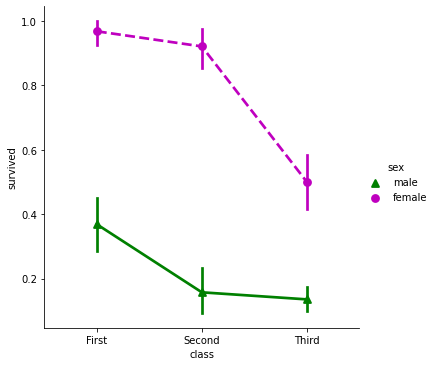

In [330]:
#點圖(point plot)
sns.catplot(x="class", y="survived", hue="sex", palette={"male": "g", "female": "m"}, markers=["^", "o"], linestyles=["-", "--"], kind="point", data=titanic);

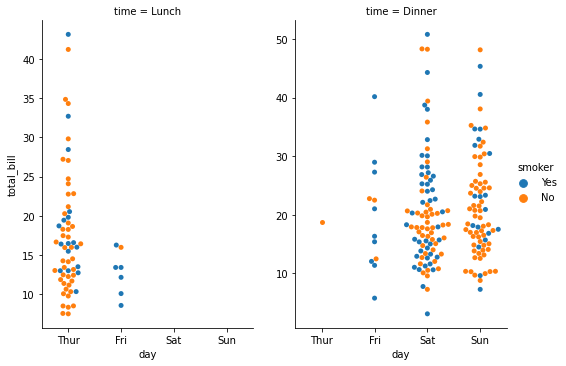

In [331]:
#使用子圖展示多重關係
tips=sns.load_dataset('tips')
sns.catplot(x="day", y="total_bill", hue="smoker", col="time", aspect=0.7, kind="swarm", data=tips,sharey=False);
plt.subplots_adjust(wspace=0.2)

# [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html)

seaborn.jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)

Return: [JointGrid](http://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid)

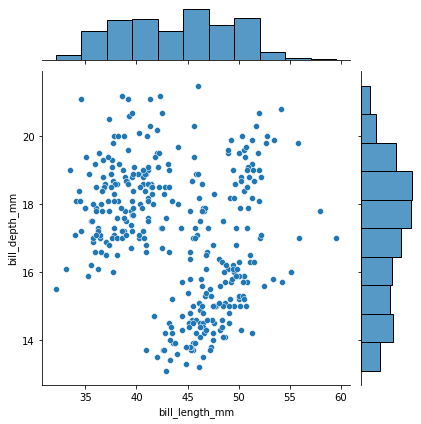

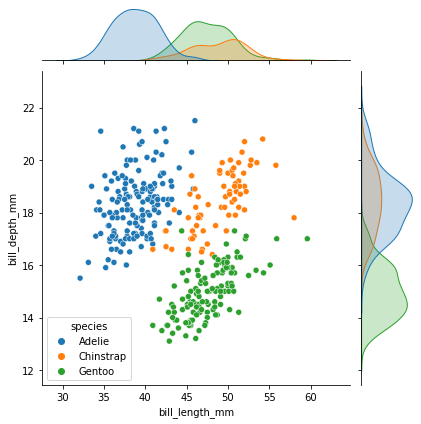

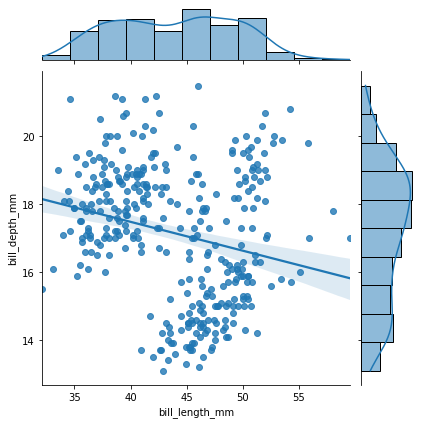

In [332]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg")

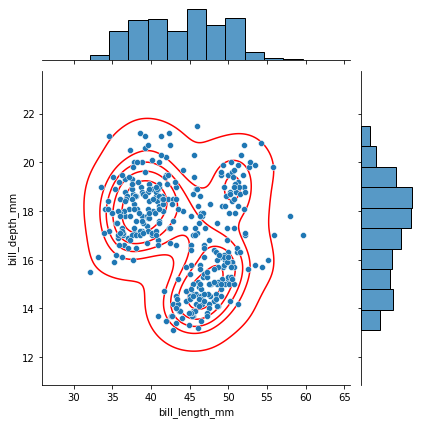

In [333]:
g = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
# g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

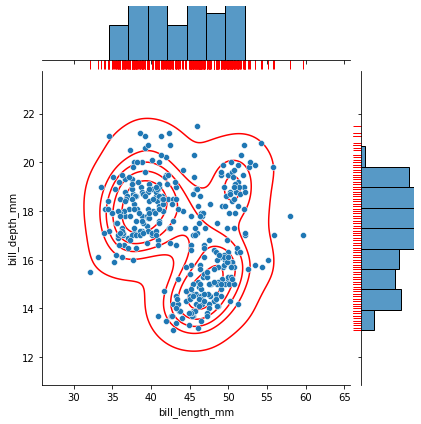

In [334]:
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

# [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid)

>__init__(self, data, *, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=False, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)

# [FacetGrid.map](https://seaborn.pydata.org/generated/seaborn.FacetGrid.map.html)

>FacetGrid.map(self, func, *args, **kwargs)

以上兩種搭配一起用

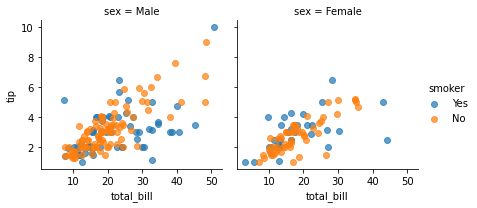

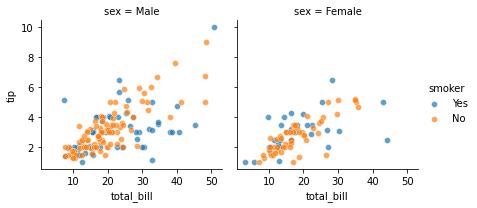

In [335]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## g.map內的plotting function可以是任何matplotlib, sns繪圖方法
tips=sns.load_dataset('tips')
g1 = sns.FacetGrid(tips, col="sex", hue="smoker")
g1.map(plt.scatter, "total_bill", "tip", alpha=.7)
g1.add_legend();

g2 = sns.FacetGrid(tips, col="sex", hue="smoker")
g2.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g2.add_legend();


# [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

> seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

> [Other reference](https://zhuanlan.zhihu.com/p/35494575)

In [336]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
print(flights)

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   31

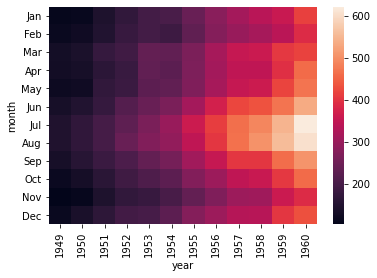

In [337]:
ax = sns.heatmap(flights)

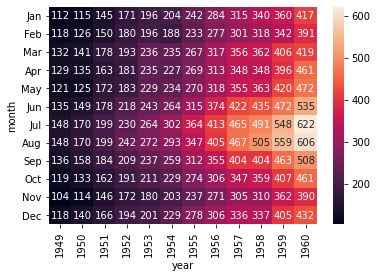

In [338]:
ax=sns.heatmap(flights, annot=True, fmt="d")

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


<AxesSubplot:>

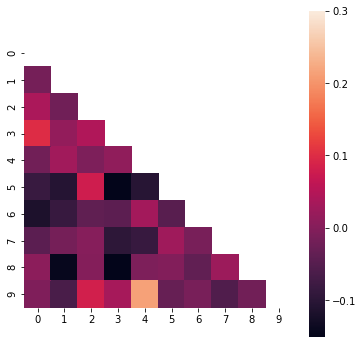

In [339]:
#用mask來只畫出部分熱力圖
random_data=np.random.randn(10, 200)
corr = np.corrcoef(random_data)
mask = np.zeros_like(corr)
print(mask)
mask[np.triu_indices_from(mask)] = True
print(mask)
fig,ax=plt.subplots(figsize=(6,6))
sns.heatmap(corr, ax=ax, mask=mask, vmax=.3, square=True)

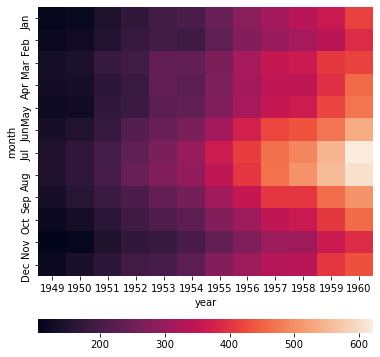

In [340]:

grid_kws = {"height_ratios": (.95, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2,figsize=(6,6) ,gridspec_kw=grid_kws)
ax = sns.heatmap(flights, ax=ax,cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})